In [1]:

import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100,              # 100টা sample/row তৈরি হবে
    n_features=2,               # প্রতিটা sample এ 2টি feature/column থাকবে
    n_informative=1,            # এর মধ্যে 1টি informative feature (অর্থাৎ যা target/class নির্ধারণে সাহায্য করবে)
    n_redundant=0,              # কোনো redundant (অর্থহীন বা duplicate) feature থাকবে না
    n_classes=2,                # 2টি class থাকবে (binary classification — 0 এবং 1)
    n_clusters_per_class=1,     # প্রতিটি class এর জন্য 1টি করে cluster থাকবে
    random_state=41,            # same output পাওয়ার জন্য seed fixed করা হয়েছে
    hypercube=False,            # features hypercube এর মধ্যে randomly ছড়ানো থাকবে না
    class_sep=10                # দুটি class এর মধ্যে separation অনেক বেশি (class একে অপর থেকে অনেক দূরে থাকবে)
)


In [2]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [3]:
import matplotlib.pyplot as plt

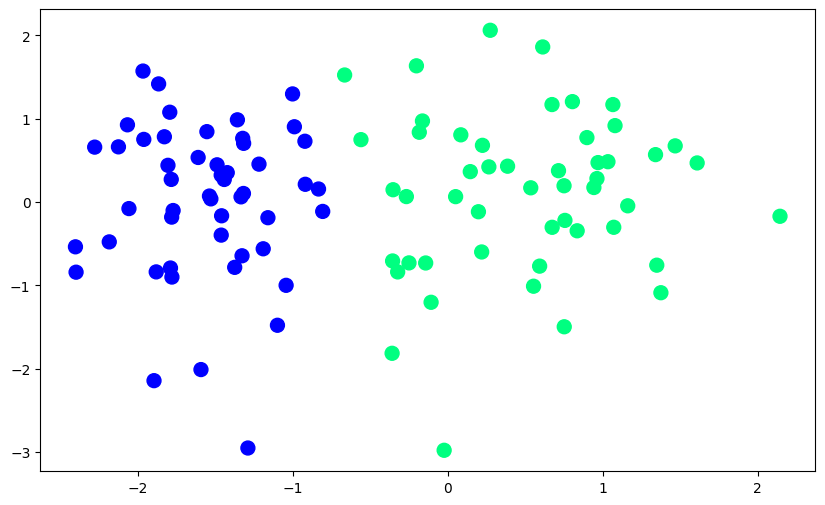

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [5]:
def step(z):
    return 1 if z > 0 else 0  # এটা binary classification এর জন্য step function

def perceptron(X, y):
    x = np.insert(X, 0, 1, axis=1)  # bias term যুক্ত করার জন্য column হিসেবে 1 যুক্ত করা হলো
    weights = np.ones(x.shape[1])  # initially সব weight 1
    lr = 0.1  # learning rate

    for i in range(1000):  # 1000 বার update করবো (epochs)
        j = np.random.randint(0, 100)  # random sample নেবো
        y_hat = step(np.dot(x[j], weights))  # prediction করবো step function দিয়ে
        weights = weights + lr * (y[j] - y_hat) * x[j]  # weights update করবো

    return weights[0], weights[1:]  # bias এবং বাকি weights return করবো


In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
intercept_

1.0

In [8]:
coef_

array([1.32609719, 0.1082106 ])

In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
m,b

(-12.254780787964608, -9.24123875814601)

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b


(-3.0, 2.0)

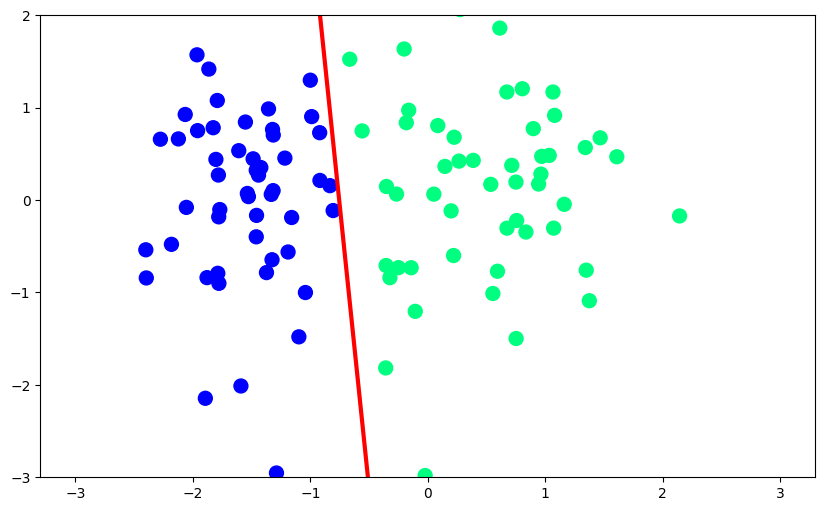

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [12]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [13]:
m,b = perceptron(X,y)

In [14]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


<IPython.core.display.Javascript object>


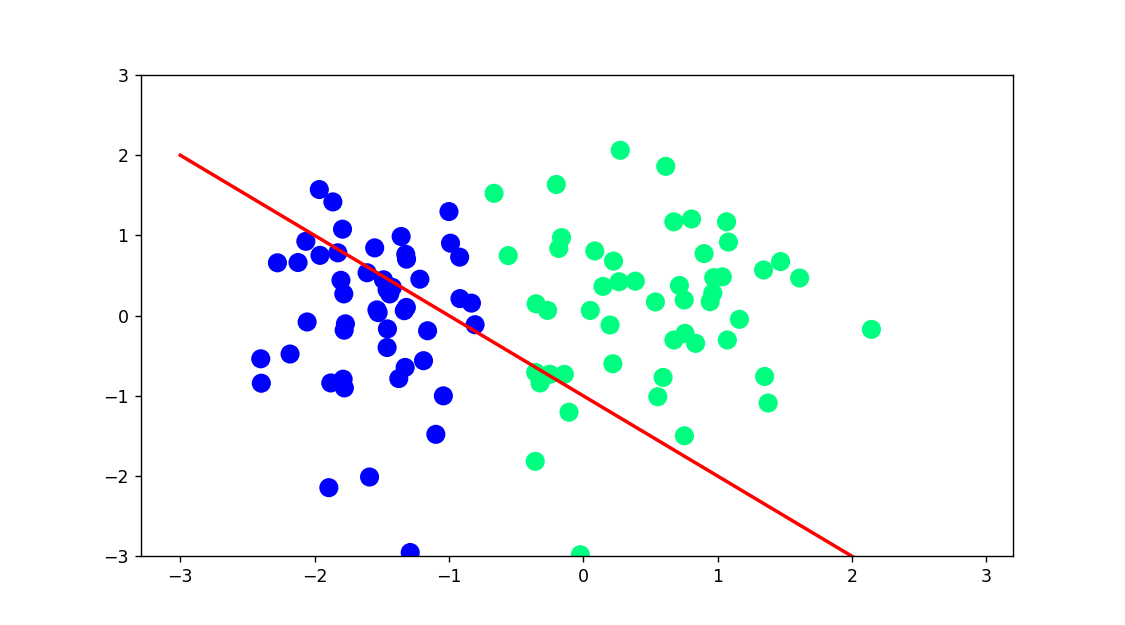

In [15]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)


In [16]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [17]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [18]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b


<IPython.core.display.Javascript object>


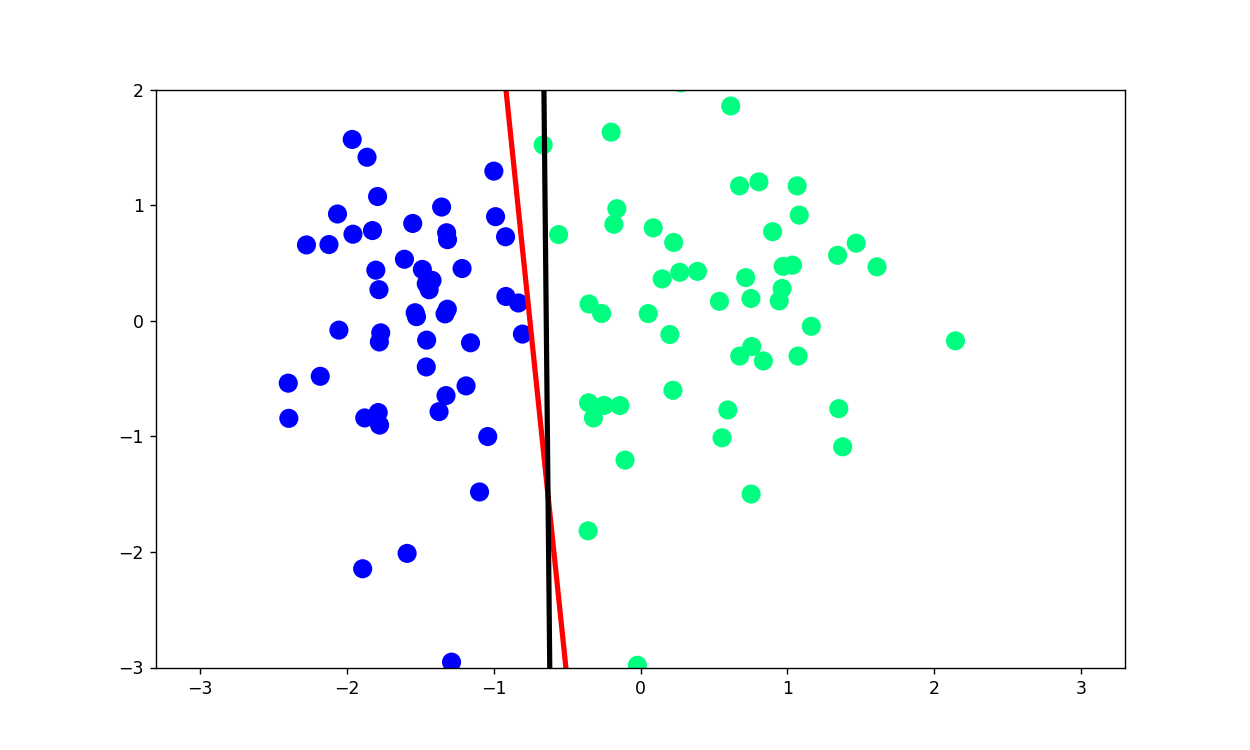

(-3.0, 2.0)

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)